<a href="https://colab.research.google.com/github/sammiyo/ML-EXAM-1/blob/master/ML_EXAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**QUESTION 1**

In [0]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg as sl
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

For 100 datapoints


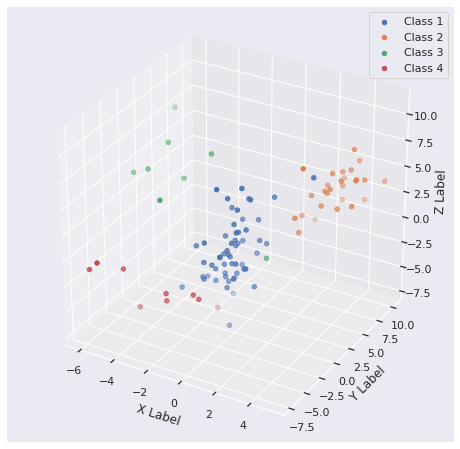

For 1000 datapoints


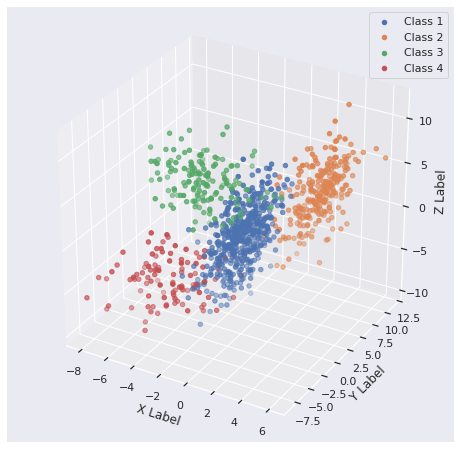

For 10000 datapoints


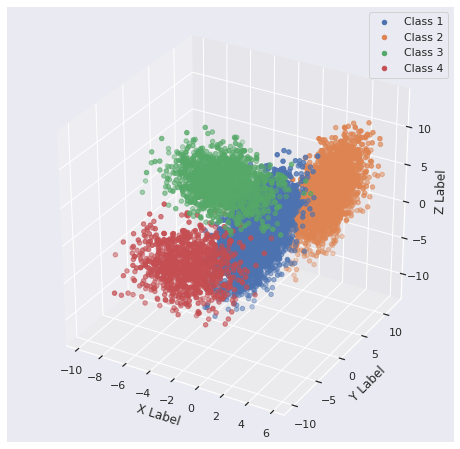

In [0]:
def randgen(size,p):
    k1=0
    k2=0
    k3=0
    a = np.random.choice(4,size,p = [p[0],p[1],p[2],p[3]])
    for i in a:
        if i == 1:
            k1 = k1+1
        if i==2:
            k2=k2+1
        if i==3:
            k3=k3+1
    nsize = [size-k1-k2-k3,k1,k2,k3]
    return(nsize)
def generate_point(size):
    mean1 = np.array([0, 0,0])
    mean2= np.array([4,7,9])
    mean3= np.array([-2,-2,7])
    mean4= np.array([-8,-4,-9])
    cov1 = np.array([[1, 2,4], [0, 1,5],[1,3,5]])
    cov2 = np.array([[1, 2,4], [0, 1,5],[1,3,5]])  # diagonal covariance
    cov3 = np.array([[-1, 0,3], [0, 2,1],[-3,-2,1]])
    cov4 = np.array([[2, 3,-3], [1, 1,6],[2,-1,0]]) 
    p=[0.5,0.25,0.15,0.1]
    n=randgen(size,p)
    x1=np.random.multivariate_normal(mean1, cov1, n[0]).T
    x2=np.random.multivariate_normal(mean2, cov2, n[1]).T
    x3=np.random.multivariate_normal(mean3, cov3, n[2]).T
    x4=np.random.multivariate_normal(mean4, cov4, n[3]).T
    b=np.full((x1.shape[1],1), 0)
    c=np.full((x2.shape[1],1), 1)
    d=np.full((x3.shape[1],1), 2)
    e=np.full((x4.shape[1],1), 3)
    y=np.concatenate((b,c,d,e),0)
    xt=np.concatenate((x1.T,x2.T,x3.T,x4.T),0)
    return x1,x2,x3,x4,y,xt
def prob(a,b,c,d):
    true=1-len(list(set(c11+c22+c33+c44)))/10000
    print("Probability of error for MAP is", true/2)
def generate_plot(size):
    mean1 = np.array([0, 0,0])
    mean2= np.array([3,7,3])
    mean3= np.array([-2,-2,7])
    mean4= np.array([-4,-4,-4])
    cov1 = np.array([[1, 2,4], [0, 1,5],[1,3,5]])
    cov2 = np.array([[1, 2,4], [0, 1,5],[1,3,5]])  # diagonal covariance
    cov3 = np.array([[-1, 0,3], [0, 2,1],[-3,-2,1]])
    cov4 = np.array([[2, 3,-3], [1, 1,6],[2,-1,0]]) 
    p=[0.5,0.25,0.15,0.1]
    n=randgen(size,p)
    x1=np.random.multivariate_normal(mean1, cov1, n[0]).T
    x2=np.random.multivariate_normal(mean2, cov2, n[1]).T
    x3=np.random.multivariate_normal(mean3, cov3, n[2]).T
    x4=np.random.multivariate_normal(mean4, cov4, n[3]).T
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1[0,:], x1[1,:],x1[2,:],label='Class 1',marker='o')
    ax.scatter(x2[0,:], x2[1,:],x2[2,:],label='Class 2')
    ax.scatter(x3[0,:], x3[1,:],x3[2,:],label='Class 3')
    ax.scatter(x4[0,:], x4[1,:],x4[2,:],label='Class 4')
    ax.legend()
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()
print("For 100 datapoints")
generate_plot(100)
print("For 1000 datapoints")
generate_plot(1000)
print("For 10000 datapoints")
generate_plot(10000)

x1hun,x2hun,x3hun,x4hun,yhund,xthun=generate_point(100)
x1th,x2th,x3th,x4th,yth,xthyo=generate_point(1000)
x1a,x2a,x3a,x4a,ya,xa=generate_point(10000)
x1,x2,x3,x4,y,xth=generate_point(10000)

In [0]:
mean1 = np.array([0, 0,0])
mean2= np.array([4,7,9])
mean3= np.array([-2,-2,7])
mean4= np.array([-8,-4,-9])
cov1 = np.array([[1, 2,4], [0, 1,5],[1,3,5]])
cov2 = np.array([[1, 2,4], [0, 1,5],[1,3,5]])  # diagonal covariance
cov3 = np.array([[-1, 0,3], [0, 2,1],[-3,-2,1]])
cov4 = np.array([[2, 3,-3], [1, 1,6],[2,-1,0]]) 
m1=mean1.reshape(3,1)
m2=mean2.reshape(3,1)
m3=mean3.reshape(3,1)
m4=mean4.reshape(3,1)
gx11=np.diag((-1/2)*(x1-m1).T@(np.linalg.inv(cov1))@(x1-m1))-(1/2)*np.linalg.det(cov1)+(1/2)*np.log(0.5)
gx12=np.diag((-1/2)*(x2-m1).T@(np.linalg.inv(cov1))@(x2-m1))-(1/2)*np.linalg.det(cov1)+(1/2)*np.log(0.25)
gx13=np.diag((-1/2)*(x3-m1).T@(np.linalg.inv(cov1))@(x3-m1))-(1/2)*np.linalg.det(cov1)+(1/2)*np.log(0.15)
gx14=np.diag((-1/2)*(x4-m1).T@(np.linalg.inv(cov1))@(x4-m1))-(1/2)*np.linalg.det(cov1)+(1/2)*np.log(0.1)

gx21=np.diag((-1/2)*(x1-m2).T@(np.linalg.inv(cov2))@(x1-m2))-(1/2)*np.linalg.det(cov2)+(1/2)*np.log(0.5)
gx22=np.diag((-1/2)*(x2-m2).T@(np.linalg.inv(cov2))@(x2-m2))-(1/2)*np.linalg.det(cov2)+(1/2)*np.log(0.25)
gx23=np.diag((-1/2)*(x3-m2).T@(np.linalg.inv(cov2))@(x3-m2))-(1/2)*np.linalg.det(cov2)+(1/2)*np.log(0.15)
gx24=np.diag((-1/2)*(x4-m2).T@(np.linalg.inv(cov2))@(x4-m2))-(1/2)*np.linalg.det(cov2)+(1/2)*np.log(0.1)

gx31=np.diag((-1/2)*(x1-m3).T@(np.linalg.inv(cov3))@(x1-m3))-(1/2)*np.linalg.det(cov3)+(1/2)*np.log(0.5)
gx32=np.diag((-1/2)*(x2-m3).T@(np.linalg.inv(cov3))@(x2-m3))-(1/2)*np.linalg.det(cov3)+(1/2)*np.log(0.25)
gx33=np.diag((-1/2)*(x3-m3).T@(np.linalg.inv(cov3))@(x3-m3))-(1/2)*np.linalg.det(cov3)+(1/2)*np.log(0.15)
gx34=np.diag((-1/2)*(x4-m3).T@(np.linalg.inv(cov3))@(x4-m3))-(1/2)*np.linalg.det(cov3)+(1/2)*np.log(0.1)

gx41=np.diag((-1/2)*(x1-m4).T@(np.linalg.inv(cov4))@(x1-m4))-(1/2)*np.linalg.det(cov4)+(1/2)*np.log(0.5)
gx42=np.diag((-1/2)*(x2-m4).T@(np.linalg.inv(cov4))@(x2-m4))-(1/2)*np.linalg.det(cov4)+(1/2)*np.log(0.25)
gx43=np.diag((-1/2)*(x3-m4).T@(np.linalg.inv(cov4))@(x3-m4))-(1/2)*np.linalg.det(cov4)+(1/2)*np.log(0.15)
gx44=np.diag((-1/2)*(x4-m4).T@(np.linalg.inv(cov4))@(x4-m4))-(1/2)*np.linalg.det(cov4)+(1/2)*np.log(0.1)




k11=((gx11>gx21)&(gx11>gx31)&(gx11>gx41))
k21=((gx21>gx11)&(gx21>gx31)&(gx21>gx41))
k31=((gx31>gx21)&(gx31>gx11)&(gx31>gx41))
k41=((gx41>gx21)&(gx41>gx11)&(gx41>gx31))

k12=((gx12>gx22)&(gx12>gx32)&(gx12>gx42))
k22=((gx22>gx12)&(gx22>gx32)&(gx22>gx42))
k32=((gx32>gx22)&(gx32>gx12)&(gx32>gx42))
k42=((gx42>gx22)&(gx42>gx12)&(gx42>gx32))

k13=((gx13>gx23)&(gx13>gx33)&(gx13>gx43))
k23=((gx23>gx13)&(gx23>gx33)&(gx23>gx43))
k33=((gx33>gx23)&(gx33>gx13)&(gx33>gx43))
k43=((gx43>gx23)&(gx43>gx13)&(gx43>gx33))

k14=((gx14>gx24)&(gx14>gx34)&(gx14>gx44))
k24=((gx24>gx14)&(gx24>gx34)&(gx24>gx44))
k34=((gx34>gx14)&(gx34>gx24)&(gx34>gx44))
k44=((gx44>gx14)&(gx44>gx24)&(gx44>gx34))

p21=gx21-gx11
p31=gx31-gx11
p41=gx41-gx11
p12=gx12-gx22
p32=gx32-gx22
p42=gx42-gx22
p13=gx13-gx33
p23=gx23-gx33
p43=gx43-gx33
p14=gx14-gx44
p24=gx24-gx44
p34=gx34-gx44
c11=[]
c12=[]
c13=[]
c14=[]
c22=[]
c21=[]
c23=[]
c24=[]
c31=[]
c32=[]
c33=[]
c34=[]
c41=[]
c42=[]
c43=[]
c44=[]

for i in range(0,len(p21)):
  if p21[i]<0:
    c11.append(i) #gx11>gx21 so class 1 correct
  else:
    c12.append(i) #class 1 as 2
for i in range(0,len(p31)):
  if p31[i]<0:
    c11.append(i) #gx11>gx31 so class 1 correct
  else:
    c13.append(i) #class 1 as 3
for i in range(0,len(p41)):
  if p41[i]<0:
    c11.append(i) #gx11>gx41 so class 1 correct
  else:
    c14.append(i) #class 1 as 4

for i in range(0,len(p12)):
  if p12[i]<0:
    c22.append(i) #class 2 correct
  else:
    c21.append(i) #class 2 as 1
for i in range(0,len(p32)):
  if p32[i]<0:
    c22.append(i) # class 2 correct
  else:
    c23.append(i) #class 2 as 3
for i in range(0,len(p42)):
  if p42[i]<0:
    c22.append(i) #class 2 correct
  else:
    c24.append(i) #class 2 as 4

for i in range(0,len(p13)):
  if p13[i]<0:
    c33.append(i) #class 3 correct
  else:
    c31.append(i) #class 3 as 1
for i in range(0,len(p23)):
  if p23[i]<0:
    c33.append(i) # class 3 correct
  else:
    c32.append(i) #class 3 as 2
for i in range(0,len(p43)):
  if p43[i]<0:
    c33.append(i) #class 3 correct
  else:
    c34.append(i) #class 3 as 4

for i in range(0,len(p14)):
  if p14[i]<0:
    c44.append(i) #class 4 correct
  else:
    c41.append(i) #class 4 as 1
for i in range(0,len(p24)):
  if p24[i]<0:
    c44.append(i) # class 4 correct
  else:
    c42.append(i) #class 4 as 2
for i in range(0,len(p34)):
  if p34[i]<0:
    c44.append(i) #class 4 correct
  else:
    c43.append(i) #class 4 as 3
prob(c11,c22,c33,c44)

Probability of error for MAP is 0.2515


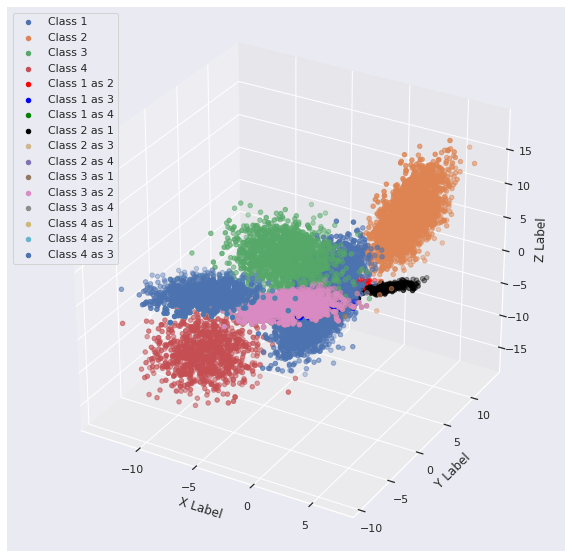

In [0]:
b12= [x1[:,i] for i in c12]
b13= [x1[:,i] for i in c13]
b14=[x1[:,i] for i in c14]
b21= [x2[:,i] for i in c21]
b23= [x2[:,i] for i in c23]
b24=[x2[:,i] for i in c24]
b31= [x3[:,i] for i in c31]
b32= [x3[:,i] for i in c32]
b34=[x3[:,i] for i in c34]
b41= [x4[:,i] for i in c41]
b42= [x4[:,i] for i in c42]
b43=[x4[:,i] for i in c43]
p=(len(b12)+len(b13)+len(b14)+len(b21)+len(b23)+len(b24)+len(b31)+len(b32)+len(b34)+len(b41)+len(b42)+len(b43))/10000
p
ax12=[]
ay12=[]
ax13=[]
ay13=[]
ax14=[]
ay14=[]
ax21=[]
ay21=[]
ax23=[]
ay23=[]
ax24=[]
ay24=[]
ax31=[]
ay31=[]
ax32=[]
ay32=[]
ax34=[]
ay34=[]
ax41=[]
ay41=[]
ax42=[]
ay42=[]
ax43=[]
ay43=[]
for i in b12:
  ax12.append(i[0])
  ay12.append(i[1])
for i in b13:
  ax13.append(i[0])
  ay13.append(i[1])
for i in b14:
  ax14.append(i[0])
  ay14.append(i[1])
for i in b21:
  ax21.append(i[0])
  ay21.append(i[1])
for i in b23:
  ax23.append(i[0])
  ay23.append(i[1])
for i in b24:
  ax24.append(i[0])
  ay24.append(i[1])
for i in b31:
  ax31.append(i[0])
  ay31.append(i[1])
for i in b32:
  ax32.append(i[0])
  ay32.append(i[1])
for i in b34:
  ax34.append(i[0])
  ay34.append(i[1])
for i in b41:
  ax41.append(i[0])
  ay41.append(i[1])
for i in b42:
  ax42.append(i[0])
  ay42.append(i[1])
for i in b43:
  ax43.append(i[0])
  ay43.append(i[1])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1[0,:], x1[1,:],x1[2,:],label='Class 1',marker='o')
ax.scatter(x2[0,:], x2[1,:],x2[2,:],label='Class 2')
ax.scatter(x3[0,:], x3[1,:],x3[2,:],label='Class 3')
ax.scatter(x4[0,:], x4[1,:],x4[2,:],label='Class 4')
ax.scatter(ax12,ay12,color="red", label='Class 1 as 2')
ax.scatter(ax13,ay13,color="blue", label='Class 1 as 3')
ax.scatter(ax14,ay14,color="green", label='Class 1 as 4')
ax.scatter(ax21,ay21,color="black", label='Class 2 as 1')
ax.scatter(ax23,ay23,color="tan", label='Class 2 as 3')
ax.scatter(ax24,ay24, label='Class 2 as 4')
ax.scatter(ax31,ay31, label='Class 3 as 1')
ax.scatter(ax32,ay32, label='Class 3 as 2')
ax.scatter(ax34,ay34, label='Class 3 as 4')
ax.scatter(ax41,ay41, label='Class 4 as 1')
ax.scatter(ax42,ay42, label='Class 4 as 2')
ax.scatter(ax43,ay43, label='Class 4 as 3')
ax.legend()
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


In [0]:

i=[10,20,30,40,50,60,70,80,90,100]
pg = dict(i=i)
xtest=np.concatenate((x1.T,x2.T,x3.T,x4.T),0)
b2=np.full((x1.shape[1],1), 0)
c2=np.full((x2.shape[1],1), 1)
d2=np.full((x3.shape[1],1), 2)
e2=np.full((x4.shape[1],1), 3)
y2=np.concatenate((b2,c2,d2,e2),0)
ktrain1=to_categorical(yhund)
ktest=to_categorical(y2)



In [0]:
def bm(i=0):
  model = Sequential() 
  model.add(Dense(i, input_shape=(3,), activation='softplus'))
  model.add(Dense(4, activation='sigmoid'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
  return model

kf = KFold(n_splits=10, shuffle=True)
est = KerasClassifier(build_fn=bm, epochs=10, batch_size=10, verbose=0)
grid = GridSearchCV(estimator=est, param_grid=pg, cv=kf,n_jobs=-1)
gr3 = grid.fit(xthun, ktrain1)
mm = gr3.cv_results_['mean_test_score']
n=gr3.best_params_
sc=gr3.best_score_
pms = gr3.cv_results_['params']
sd = gr3.cv_results_['std_test_score']

for mm, sd, pm in zip(mm, sd, pms):
    print("%f is test score with: %r" % (mm, pm))
print("Best score: %f using %s" % (sc, n))


0.480000 is test score with: {'i': 10}
0.660000 is test score with: {'i': 20}
0.740000 is test score with: {'i': 30}
0.720000 is test score with: {'i': 40}
0.770000 is test score with: {'i': 50}
0.850000 is test score with: {'i': 60}
0.800000 is test score with: {'i': 70}
0.830000 is test score with: {'i': 80}
0.710000 is test score with: {'i': 90}
0.750000 is test score with: {'i': 100}
Best score: 0.850000 using {'i': 60}


In [0]:
hun=gr3.best_params_['i']
model = Sequential() 
model.add(Dense(hun, input_shape=(3,), activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
model.fit(xthun,ktrain1,epochs=100)
_, accuracy=model.evaluate(xtest, ktest)
print(accuracy)
print("probability of error for 100 points:",1-accuracy)

Epoch 1/100
100/100 [==============================] - 3s 26ms/step - loss: 1.3804 - acc: 0.2400
Epoch 2/100
100/100 [==============================] - 0s 209us/step - loss: 1.2998 - acc: 0.4000
Epoch 3/100
100/100 [==============================] - 0s 236us/step - loss: 1.2477 - acc: 0.5000
Epoch 4/100
100/100 [==============================] - 0s 206us/step - loss: 1.2003 - acc: 0.6200
Epoch 5/100
100/100 [==============================] - 0s 210us/step - loss: 1.1529 - acc: 0.7300
Epoch 6/100
100/100 [==============================] - 0s 213us/step - loss: 1.1086 - acc: 0.7500
Epoch 7/100
100/100 [==============================] - 0s 227us/step - loss: 1.0624 - acc: 0.7800
Epoch 8/100
100/100 [==============================] - 0s 212us/step - loss: 1.0212 - acc: 0.7800
Epoch 9/100
100/100 [==============================] - 0s 225us/step - loss: 0.9836 - acc: 0.7800
Epoch 10/100
100/100 [==============================] - 0s 225us/step - loss: 0.9461 - acc: 0.7200
Epoch 11/100
100/100

In [0]:
ktrain2=to_categorical(yth)


kf = KFold(n_splits=10, shuffle=True)
est = KerasClassifier(build_fn=bm, epochs=10, batch_size=10, verbose=0)
grid = GridSearchCV(estimator=est, param_grid=pg, cv=kf,n_jobs=-1)
gr4 = grid.fit(xthyo, ktrain2)
mm = gr4.cv_results_['mean_test_score']
n=gr4.best_params_
sc=gr4.best_score_
pms = gr4.cv_results_['params']
sd = gr4.cv_results_['std_test_score']

for mm, sd, pm in zip(mm, sd, pms):
    print("Test score is %f  with: %r" % (mm, pm))
print("Best score: %f using %s" % (sc, n))




Test score is 0.827000  with: {'i': 10}
Test score is 0.822000  with: {'i': 20}
Test score is 0.915000  with: {'i': 30}
Test score is 0.927000  with: {'i': 40}
Test score is 0.864000  with: {'i': 50}
Test score is 0.933000  with: {'i': 60}
Test score is 0.947000  with: {'i': 70}
Test score is 0.891000  with: {'i': 80}
Test score is 0.929000  with: {'i': 90}
Test score is 0.901000  with: {'i': 100}
Best score: 0.947000 using {'i': 70}


In [0]:
thous=gr4.best_params_['i']
model = Sequential() 
model.add(Dense(thous, input_shape=(3,), activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
model.fit(xtt,k,epochs=100)
_, acc=model.evaluate(xtest, k_new)
print(acc)
print("Probability of error for 1000 points:",1-acc)

Epoch 1/100
100/100 [==============================] - 2s 18ms/step - loss: 1.5193 - acc: 0.4700
Epoch 2/100
100/100 [==============================] - 0s 261us/step - loss: 1.4605 - acc: 0.4800
Epoch 3/100
100/100 [==============================] - 0s 223us/step - loss: 1.4094 - acc: 0.4800
Epoch 4/100
100/100 [==============================] - 0s 210us/step - loss: 1.3574 - acc: 0.5000
Epoch 5/100
100/100 [==============================] - 0s 219us/step - loss: 1.3113 - acc: 0.5000
Epoch 6/100
100/100 [==============================] - 0s 226us/step - loss: 1.2646 - acc: 0.5300
Epoch 7/100
100/100 [==============================] - 0s 251us/step - loss: 1.2268 - acc: 0.5300
Epoch 8/100
100/100 [==============================] - 0s 234us/step - loss: 1.1848 - acc: 0.5200
Epoch 9/100
100/100 [==============================] - 0s 254us/step - loss: 1.1497 - acc: 0.5200
Epoch 10/100
100/100 [==============================] - 0s 347us/step - loss: 1.1132 - acc: 0.5400
Epoch 11/100
100/100

In [0]:
ktrain=to_categorical(ya)
kf = KFold(n_splits=10, shuffle=True)
est = KerasClassifier(build_fn=bm, epochs=10, batch_size=100, verbose=0)
grid = GridSearchCV(estimator=est, param_grid=pg, cv=kf,n_jobs=-1)
gr = grid.fit(xa, ktrain)
mm = gr.cv_results_['mean_test_score']
n=gr.best_params_
sc=gr.best_score_
pms = gr.cv_results_['params']
sd = gr.cv_results_['std_test_score']

for mm, sd, pm in zip(mm, sd, pms):
    print("%f (%f) with: %r" % (mm, sd, pm))
print("Best: %f using %s" % (sc, n))


0.818200 (0.153261) with: {'i': 10}
0.924200 (0.075346) with: {'i': 20}
0.917100 (0.072517) with: {'i': 30}
0.941000 (0.043197) with: {'i': 40}
0.926200 (0.048511) with: {'i': 50}
0.913700 (0.078246) with: {'i': 60}
0.851800 (0.127937) with: {'i': 70}
0.914100 (0.044142) with: {'i': 80}
0.923300 (0.045937) with: {'i': 90}
0.936200 (0.049477) with: {'i': 100}
Best: 0.941000 using {'i': 40}


In [0]:
tenth=gr.best_params_['i']
model = Sequential() 
model.add(Dense(tenth, input_shape=(3,), activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
model.fit(xtt,k,epochs=100)
_, accuracy=model.evaluate(xtest, k_new)
print(accuracy)
print("probability of error for 10000:",1-accuracy)

Epoch 1/100
100/100 [==============================] - 2s 18ms/step - loss: 1.9095 - acc: 0.1100
Epoch 2/100
100/100 [==============================] - 0s 239us/step - loss: 1.8071 - acc: 0.1400
Epoch 3/100
100/100 [==============================] - 0s 256us/step - loss: 1.7186 - acc: 0.1300
Epoch 4/100
100/100 [==============================] - 0s 274us/step - loss: 1.6382 - acc: 0.1300
Epoch 5/100
100/100 [==============================] - 0s 265us/step - loss: 1.5663 - acc: 0.1300
Epoch 6/100
100/100 [==============================] - 0s 240us/step - loss: 1.4960 - acc: 0.1500
Epoch 7/100
100/100 [==============================] - 0s 266us/step - loss: 1.4340 - acc: 0.1800
Epoch 8/100
100/100 [==============================] - 0s 275us/step - loss: 1.3754 - acc: 0.2000
Epoch 9/100
100/100 [==============================] - 0s 302us/step - loss: 1.3213 - acc: 0.2400
Epoch 10/100
100/100 [==============================] - 0s 396us/step - loss: 1.2686 - acc: 0.2700
Epoch 11/100
100/100

#QUESTION 2

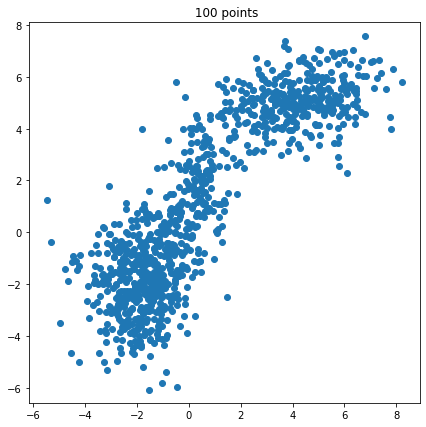

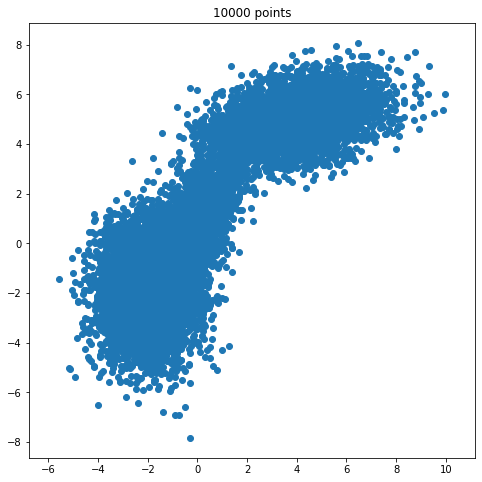

In [16]:
import numpy as np
def randgen(size,p):
    k1 = 0
    k2 = 0
    a = np.random.choice(3,size,p = [p[0],p[1],p[2]])
    for i in a:
        if i == 1:
            k1 = k1+1
        if i==2:
            k2=k2+1
    nsize = [size-k1-k2,k1,k2]
    return(nsize)
size_train=1000
size_test=10000
p=[0.2,0.35,0.45]
n_train=randgen(size_train,p)
n_test=randgen(size_test,p)
mean1 = np.array([0, 1])
mean2= np.array([4,5])
mean3= np.array([-2,-2])
cov1 = np.array([[1, 2], [0, 1]])
cov2 = np.array([[2, 1], [2, 0]])  
cov3 = np.array([[-1, 0], [0, 2]])
x1train=np.random.multivariate_normal(mean1, cov1, n_train[0]).T
x2train=np.random.multivariate_normal(mean2, cov2, n_train[1]).T
x3train=np.random.multivariate_normal(mean3, cov3, n_train[2]).T
xtrain=np.concatenate((x1train.T,x2train.T,x3train.T),0)
b=np.full((x1train.shape[0],1), 0)
c=np.full((x2train.shape[0],1), 1)
d=np.full((x3train.shape[0],1), 2)
ytrain=np.concatenate((b,c,d),0)
x1test=np.random.multivariate_normal(mean1, cov1, n_test[0]).T
x2test=np.random.multivariate_normal(mean2, cov2, n_test[1]).T
x3test=np.random.multivariate_normal(mean3, cov3, n_test[2]).T
xtest=np.concatenate((x1test.T,x2test.T,x3test.T),0)
btest=np.full((x1test.shape[0],1), 0)
ctest=np.full((x2test.shape[0],1), 1)
dtest=np.full((x3test.shape[0],1), 2)
ytest=np.concatenate((btest,ctest,dtest),0)
plt.figure(figsize=(7,7))
plt.scatter(xtrain.T[0,:], xtrain.T[1,:])
plt.axis('equal')
plt.title(' 100 points')

plt.show()
plt.figure(figsize=(8,8))
plt.scatter(xtest.T[0,:], xtest.T[1,:])
plt.axis('equal')
plt.title('10000 points')

plt.show()

In [18]:
def bm1(i=0,activation='softplus'):
  model = Sequential() 
  model.add(Dense(i, input_dim=1, activation=activation))
  model.add(Dense(1, activation='linear'))
  model.compile(optimizer='sgd', loss='mean_squared_error') 
  return model
i=[10,20,30,40,50,60,70,80,90,100]
activations=['sigmoid','softplus']
pg = dict(i=i,activation=activations)
kf = KFold(n_splits=10, shuffle=True)
est = KerasRegressor(build_fn=bm1, epochs=100, batch_size=200, verbose=0)
grid = GridSearchCV(est, param_grid=pg, cv=kf,n_jobs=-1)
gr1 = grid.fit(xtrain[:,0],xtrain[:,1])
n=gr1.best_params_
sc=gr1.best_score_
print("Best: %f using %s" % (sc, n))


Best: -2.718888 using {'activation': 'softplus', 'i': 10}


In [19]:
model = Sequential() 
model.add(Dense(gr1.best_params_['i'], input_dim=1, activation='softplus'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain[:,0],xtrain[:,1],epochs=10)
loss=model.evaluate(xtest[:,0],xtest[:,1])
predict=model.predict(xtest[:,0])
print(loss)

Epoch 1/10
1000/1000 [==============================] - 1s 581us/step - loss: 13.5044
Epoch 2/10
1000/1000 [==============================] - 0s 144us/step - loss: 11.8223
Epoch 3/10
1000/1000 [==============================] - 0s 148us/step - loss: 10.3294
Epoch 4/10
1000/1000 [==============================] - 0s 137us/step - loss: 8.9971
Epoch 5/10
1000/1000 [==============================] - 0s 132us/step - loss: 7.8017
Epoch 6/10
1000/1000 [==============================] - 0s 117us/step - loss: 6.7332
Epoch 7/10
1000/1000 [==============================] - 0s 146us/step - loss: 5.7841
Epoch 8/10
1000/1000 [==============================] - 0s 126us/step - loss: 4.9719
Epoch 9/10
1000/1000 [==============================] - 0s 132us/step - loss: 4.2966
Epoch 10/10
10000/10000 [==============================] - 1s 52us/step
3.4244965805053713


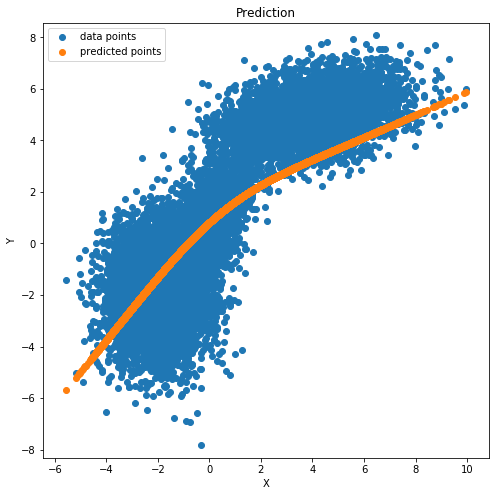

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(xtest.T[0,:],xtest.T[1,:],label='data points')
plt.scatter(xtest.T[0,:],predict,label='predicted points')
plt.axis('equal')
plt.title('Prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

